
### H 门 (Hadamard Gate): 叠加态的创造者
*   **当你对一个处于 `|0⟩` 状态的量子比特施加 H 门时：**
    它会变成 `(|0⟩ + |1⟩)/√2`。这意味着，在测量之前，这个量子比特**同时是 0 也是 1**，并且测量时得到 0 和 1 的概率各有 50%。这是量子计算并行处理能力的根本来源。

*   **当你对一个处于 `|1⟩` 状态的量子比特施加 H 门时：**
    它会变成 `(|0⟩ - |1⟩)/√2`。这同样是一个叠加态，测量时得到 0 和 1 的概率也各有 50%，但它与前一个状态有一个相位的差异。

### CX 门 (CNOT Gate): 纠缠态的制造者

CX 门是一个**双量子比特门**，它需要一个“控制”比特和一个“目标”比特。它的工作逻辑是：
*   如果**控制比特**是 `|0⟩`，那么**目标比特**什么也不做。
*   如果**控制比特**是 `|1⟩`，那么对**目标比特**执行一个 X 操作（也就是翻转它）。
CX 门 (CNOT)：这是一个操作，它的行为逻辑可以理解为一个量子版的 if 语句：
if 控制比特是 |1⟩
then 翻转目标比特
else (如果控制比特是 |0⟩)
then 什么都不做
(所以它可以用来接触纠缠)
那么，它是如何制造纠缠的呢？关键在于**当控制比特处于叠加态时**。

让我们看一个创造最著名的纠缠态——**贝尔态 (Bell State)** 的经典过程

1.  **初始状态**：我们有两个量子比特，都处于 `|0⟩` 状态。整个系统是 `|00⟩`。此时它们是独立的，没有纠缠。

2.  **第一步：施加 H 门 (qc.h(0))**
    *   我们对第一个量子比特施加 H 门。
    *   第一个比特从 `|0⟩` 变成了 `(|0⟩ + |1⟩)/√2`。
    *   整个系统现在的状态是 `(|00⟩ + |10⟩)/√2`。
    *   **重要**：此时，系统有了叠加，但**还没有纠缠**！因为你仍然可以独立地描述两个比特（第一个在叠加态，第二个确定是 `|0⟩`）。

3.  **第二步：施加 CX 门 (qc.cx(0, 1))**
    *   现在我们施加 CX 门，第一个比特是控制，第二个是目标。
    *   我们需要对叠加态中的每一部分分别看：
        *   对于 `|00⟩` 这一部分：控制位是 `0`，所以目标位不变。结果还是 `|00⟩`。
        *   对于 `|10⟩` 这一部分：控制位是 `1`，所以目标位翻转（从 `0` 变成 `1`）。结果变成 `|11⟩`。
    *   因此，整个系统的最终状态变成了 `(|00⟩ + |11⟩)/√2`。

**这就是纠缠态！** 在这个状态下，你再也无法独立地描述任何一个量子比特。它们变成了一个不可分割的整体。它们的命运被“纠缠”在了一起：
*   如果你测量第一个比特得到 `0`，你**立刻**知道第二个比特也**必然**是 `0`。
*   如果你测量第一个比特得到 `1`，你**立刻**知道第二个比特也**必然**是 `1`。

**注意**：CX 门并非总是产生纠缠。如果控制比特不是叠加态（比如是确定的 `|1⟩`），那么 CX 门就不会产生纠缠。例如，`CX|10⟩` = `|11⟩`，这个结果态就没有纠缠。因此，**“H + CX”是创造纠缠的经典组合**。


{'101': 516, '010': 508}


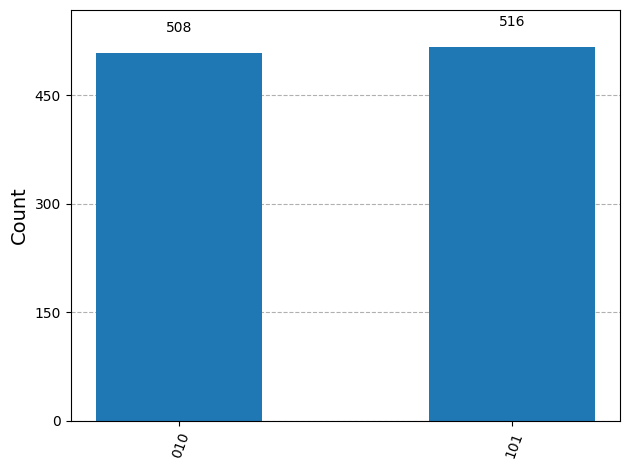

In [12]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from matplotlib import pyplot as plt
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.x(1)
qc.measure_all()

sampler = StatevectorSampler()
result = sampler.run([qc], shots=1024).result()
print(result[0].data.meas.get_counts())

from qiskit.visualization import plot_histogram
 
counts = result[0].data.meas.get_counts()
plot_histogram(counts)
 
